# NLP Utils - Text Classification example: News dataset (Kaggle)

### 0 - Setup

In [1]:
from nlp_utils import *

C:\profili\u382270\Downloads\MyStuff\anaconda2\envs\env1\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
import json

lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
        
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [20]:
dtf = pd.DataFrame(lst_dics)
dtf = dtf[ dtf["category"].isin(['CRIME','ENTERTAINMENT','POLITICS','BUSINESS','TECH']) ][["category","headline"]]
dtf.head()

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


In [21]:
dtf.to_csv("data.csv", sep='|', na_rep='', index=False)

In [4]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60221 entries, 0 to 200848
Data columns (total 2 columns):
category    60221 non-null object
headline    60221 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


### 1 - Text Analysis

###### Look for Metadata
- length
- sentiment

In [5]:
extra_features = []

###### 1.0 - Target Variable

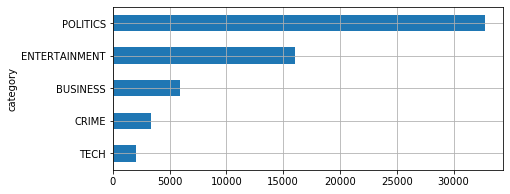

In [6]:
utils_plot_distributions(dtf, x="category", top=None, figsize=(7,3))

In [7]:
# Unbalanced

###### 1.1 - Language

In [8]:
# this takes a while
dtf = add_detect_lang(dtf, "headline")

print(" ")
print(dtf["headline"][0], " --> ", dtf["headline_lang"][0])

               count unique top   freq
headline_lang  60221     32  en  57980
 
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  -->  en


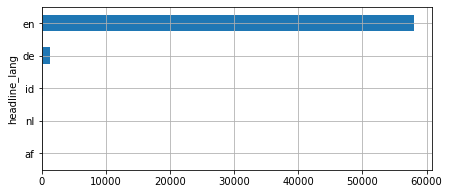

In [19]:
utils_plot_distributions(dtf, x="headline_lang", top=5, figsize=(7,3))

In [10]:
# filter only english




###### 1.2 - Length

In [11]:
dtf = add_text_count(dtf, "headline")

print(" ")
print(dtf["headline"][0], " --> ", dtf["headline_word_count"][0])
print(dtf["headline"][0], " --> ", dtf["headline_text_length"][0])

                        count       mean        std  min   25%   50%   75%  \
headline_word_count   60221.0  10.159297   2.876833  1.0   8.0  10.0  12.0   
headline_text_length  60221.0  62.726225  17.244675  0.0  52.0  64.0  74.0   

                        max  
headline_word_count    44.0  
headline_text_length  295.0  
 
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  -->  14
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  -->  64


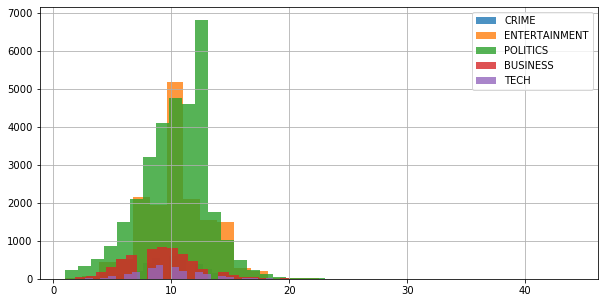

In [12]:
utils_plot_distributions(dtf, x="headline_word_count", y="category", bins=None, figsize=(10,5))

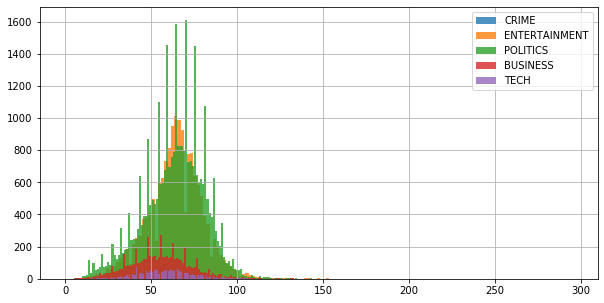

In [13]:
utils_plot_distributions(dtf, x="headline_text_length", y="category", bins=None, figsize=(10,5))

###### 1.3 - Sentiment

In [14]:
dtf = add_sentiment(dtf, "headline", algo="textblob")

print(" ")
print(dtf["headline"][0], " --> ", dtf["headline_sentiment"][0])

                      count      mean       std  min  25%  50%  75%  max
headline_sentiment  60221.0  0.044425  0.256972 -1.0  0.0  0.0  0.1  1.0
 
There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  -->  0.0


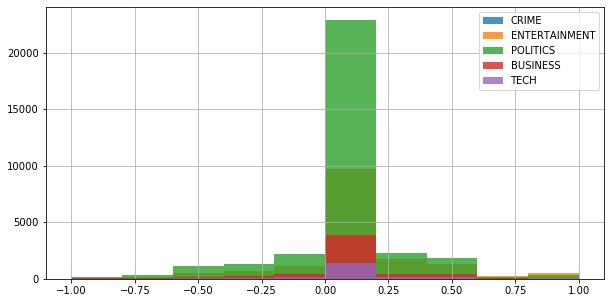

In [15]:
utils_plot_distributions(dtf, x="headline_sentiment", y="category", bins=10, figsize=(10,5))

###### 1.4 - Clean Words

In [16]:
lst_stopwords = create_stopwords(["english"], lst_new_words=[])

In [17]:
dtf = add_preprocessed_text(dtf, "headline", lst_regex=None, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)

print(dtf["headline"][0], " --> ", dtf["headline_clean"][0])

There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV  -->  2 mass shooting texas last week 1 tv


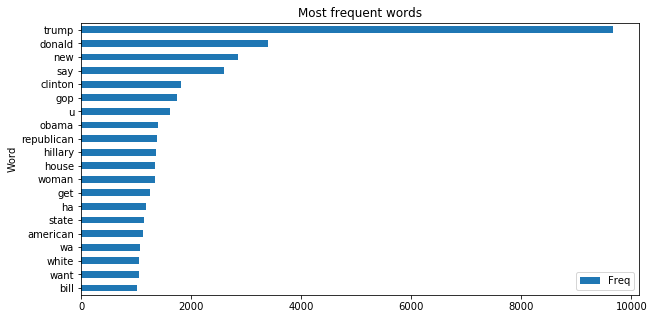

In [18]:
common_words = words_freq(dtf, "headline_clean", top=20, figsize=(10,5))

###### 1.5 - NER

--- added tags column ---


KeyError: 'headline'

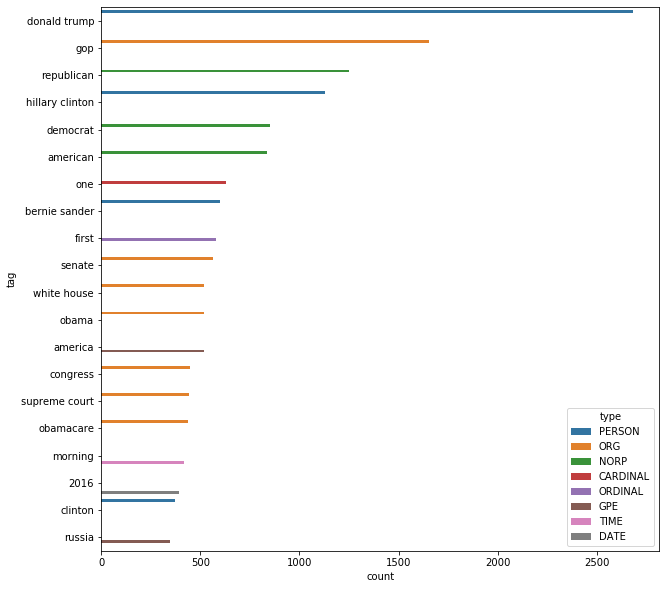

In [40]:
# this takes a while
dtf = add_ner_spacy(dtf, "headline_clean", model="en_core_web_lg", tag_type="all", top=20, figsize=(10,10))

print(dtf["headline"][0], " --> ", dtf["tags"][0])

###### 1.6 - Summary

### 2 - Baseline (Bag of Words)

###### 2.0 - Create Vocabolary

###### 2.1 - Features Engineering

###### 2.2 - Features Selection

###### 2.3 - Preprocessing

###### 2.4 - Train

###### 2.5 - Evaluate

### 3 - Model Desing & Testing (Embeddings)

###### 3.0 - Create Vocabolary

###### 3.1 - Features Engineering

###### 3.2 - Features Selection

###### 3.3 - Preprocessing

###### 3.4 - Train

###### 3.5 - Evaluate